In [1]:
from sentence_transformers import SentenceTransformer, util
print("✅ sentence-transformers fixed and working")



✅ sentence-transformers fixed and working


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from sentence_transformers import SentenceTransformer, util

print("✅ All imports successful")


✅ All imports successful


In [3]:
resume_skills = [
    "Python", "Machine Learning", "Data Analysis",
    "SQL", "Communication", "Team Work", "ML"
]

jd_skills = [
    "python ", "deep learning", "data analytics",
    "sql", "communication skills", "AI"
]


In [4]:
resume_skills = list(set(resume_skills))
jd_skills = list(set(jd_skills))


In [5]:
resume_skills = [s.lower().strip() for s in resume_skills]
jd_skills = [s.lower().strip() for s in jd_skills]


In [6]:
skills_dict = {
    "resume_skills": resume_skills,
    "jd_skills": jd_skills
}

skills_dict


{'resume_skills': ['python',
  'sql',
  'communication',
  'team work',
  'data analysis',
  'ml',
  'machine learning'],
 'jd_skills': ['communication skills',
  'ai',
  'sql',
  'deep learning',
  'data analytics',
  'python']}

In [7]:
model = SentenceTransformer("all-MiniLM-L6-v2")
print("✅ Sentence-BERT loaded")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Dharshini\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dharshini\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Sentence-BERT loaded


In [8]:
embedding = model.encode("python")
print("Embedding shape:", embedding.shape)


Embedding shape: (384,)


In [9]:
resume_embeddings = model.encode(resume_skills)


In [10]:
jd_embeddings = model.encode(jd_skills)


In [11]:
score = util.cos_sim(
    model.encode("python"),
    model.encode("machine learning")
)

score.item()


0.3613273799419403

In [12]:
def compare_one_to_all(skill, jd_skills):
    return {
        jd: util.cos_sim(
            model.encode(skill),
            model.encode(jd)
        ).item()
        for jd in jd_skills
    }

compare_one_to_all("python", jd_skills)


{'communication skills': 0.11194990575313568,
 'ai': 0.39887556433677673,
 'sql': 0.2999843955039978,
 'deep learning': 0.311274915933609,
 'data analytics': 0.3716872036457062,
 'python': 1.0000001192092896}

In [13]:
similarity_matrix = util.cos_sim(resume_embeddings, jd_embeddings).numpy()


In [14]:
df_similarity = pd.DataFrame(
    similarity_matrix,
    index=resume_skills,
    columns=jd_skills
)

df_similarity


,communication skills,ai,sql,deep learning,data analytics,python
python,0.111950,0.398876,0.299985,0.311275,0.371687,1.000000
sql,0.105377,0.268765,1.000000,0.223104,0.520553,0.299985
communication,0.702663,0.364164,0.222640,0.278189,0.303022,0.220291
team work,0.308145,0.331559,0.206782,0.205106,0.293905,0.243940
data analysis,0.205884,0.356145,0.446797,0.342618,0.731146,0.275139
ml,0.132113,0.343805,0.278818,0.357854,0.289121,0.288229
machine learning,0.150996,0.546372,0.316897,0.688687,0.590425,0.361327


In [15]:
best_matches = {
    jd: df_similarity[jd].idxmax()
    for jd in df_similarity.columns
}

best_matches


{'communication skills': 'communication',
 'ai': 'machine learning',
 'sql': 'sql',
 'deep learning': 'machine learning',
 'data analytics': 'data analysis',
 'python': 'python'}

In [16]:
HIGH = 0.75
LOW = 0.4


In [17]:
skill_gap_report = {
    "matched": [],
    "partial": [],
    "missing": []
}

for jd in df_similarity.columns:
    score = df_similarity[jd].max()
    skill = df_similarity[jd].idxmax()

    if score >= HIGH:
        skill_gap_report["matched"].append((jd, skill, score))
    elif score >= LOW:
        skill_gap_report["partial"].append((jd, skill, score))
    else:
        skill_gap_report["missing"].append(jd)

skill_gap_report


{'matched': [('sql', 'sql', 0.9999998807907104),
  ('python', 'python', 1.0000001192092896)],
 'partial': [('communication skills', 'communication', 0.7026634216308594),
  ('ai', 'machine learning', 0.546371579170227),
  ('deep learning', 'machine learning', 0.6886870861053467),
  ('data analytics', 'data analysis', 0.7311458587646484)],
 'missing': []}

In [18]:
with open("skill_gap_report.json", "w") as f:
    json.dump(skill_gap_report, f, indent=4)


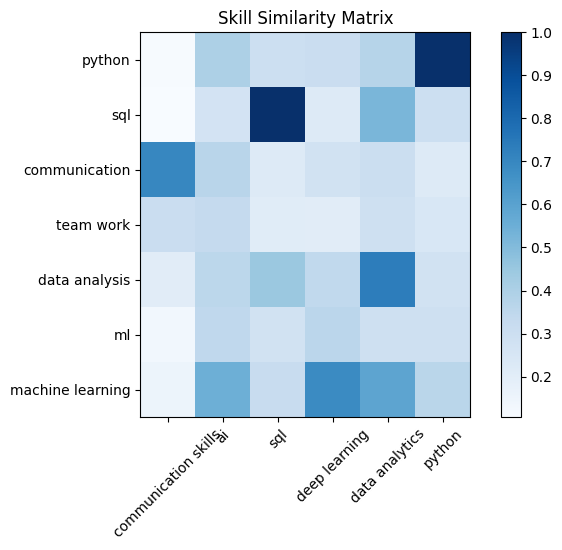

In [19]:
plt.figure(figsize=(8,5))
plt.imshow(df_similarity.values, cmap="Blues")
plt.colorbar()
plt.xticks(range(len(jd_skills)), jd_skills, rotation=45)
plt.yticks(range(len(resume_skills)), resume_skills)
plt.title("Skill Similarity Matrix")
plt.show()


In [20]:
max_values = df_similarity.idxmax()

max_values


communication skills       communication
ai                      machine learning
sql                                  sql
deep learning           machine learning
data analytics             data analysis
python                            python
dtype: object

In [21]:
if not resume_skills or not jd_skills:
    print("⚠️ Empty skill list detected")


In [22]:
ABBREVIATIONS = {
    "ml": "machine learning",
    "ai": "artificial intelligence"
}

resume_skills = [ABBREVIATIONS.get(s, s) for s in resume_skills]
jd_skills = [ABBREVIATIONS.get(s, s) for s in jd_skills]


In [23]:
model2 = SentenceTransformer("paraphrase-MiniLM-L6-v2")

difference = np.linalg.norm(
    model.encode("python") - model2.encode("python")
)

difference


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\Dharshini\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dharshini\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

np.float32(7.5433936)

In [24]:
embedding_cache = {}

def get_embedding(skill):
    if skill not in embedding_cache:
        embedding_cache[skill] = model.encode(skill)
    return embedding_cache[skill]


In [25]:
def skill_gap_pipeline(resume, jd):
    re = model.encode(resume)
    je = model.encode(jd)
    return util.cos_sim(re, je)


In [26]:
top_3 = {
    jd: df_similarity[jd].nlargest(3).index.tolist()
    for jd in df_similarity.columns
}

top_3


{'communication skills': ['communication', 'team work', 'data analysis'],
 'ai': ['machine learning', 'python', 'communication'],
 'sql': ['sql', 'data analysis', 'machine learning'],
 'deep learning': ['machine learning', 'ml', 'data analysis'],
 'data analytics': ['data analysis', 'machine learning', 'sql'],
 'python': ['python', 'machine learning', 'sql']}

In [27]:
TECH_THRESHOLD = 0.75
SOFT_THRESHOLD = 0.6


In [28]:
alignment_score = df_similarity.max().mean()
round(alignment_score * 100, 2)


np.float32(77.81)

In [29]:
df_similarity.to_csv("similarity_matrix.csv")


In [30]:
# Modules:
# 1. Preprocessing
# 2. Embedding Generation
# 3. Similarity Computation
# 4. Skill Gap Analysis
# 5. Visualization
